In [198]:
%pylab inline --no-import-all
from scipy import stats
from scipy.stats import norm #will use this for plotting


Populating the interactive namespace from numpy and matplotlib


In [187]:
# import all our distributions
import distributions
N_SAMPLES = 10000
N_BINS = 50

In [127]:
# some funny python to make a list of all the distributions for convenience
all_distributions_dict = dict([(name, cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)])
all_distributions_list = [(cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)]
# print out their names
#all_distributions_dict.keys() (don't need to print this)

In [128]:
#len(all_distributions_dict.keys())

In [157]:
## Do tests
ok_distributions_list=[]
problems=[]
my_dist=[]
for i, cls in enumerate(all_distributions_list):
    try:
        dist = cls()
        N_test = N_SAMPLES
        #print('will try to generate for %s' %(cls.__name__))
        if dist.pdf(dist.x_min + .3*(dist.x_max-dist.x_min)) < 1E-3:
            print("may have a problem")
            continue
            
        rvs = dist.rvs(N_test)
        if np.abs(np.mean(rvs) - dist.mean()) > 5*np.std(rvs)/np.sqrt(N_test):
            print("means don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.mean(rvs), dist.mean()))
            continue
            
        elif np.abs(np.std(rvs) - dist.std()) > 5*np.std(rvs)/np.sqrt(np.sqrt(1.*N_test)):
            print("std devs. don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.std(rvs), dist.std()))
            continue
        elif np.abs(np.std(rvs) - dist.std()) / dist.std() > 0.1:
            print("std devs. don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.std(rvs), dist.std()))
            continue
        
        elif np.sum(dist.pdf(np.linspace(dist.x_min,dist.x_max,100))<0) > 0:
            print("pdf was negative in some places")
            continue                    

        else:
            print("%s passes tests, adding it" %(cls.__name__))
            ok_distributions_list.append(cls)
    except:
        print("%s has errors, does't work" %(cls.__name__))
        continue

print("list of ok distributions:",[i.__name__ for i in ok_distributions_list])

Dist_sm6376 passes tests, adding it
Dist_ry643 passes tests, adding it
Dist_yr595 passes tests, adding it
Dist_psa251_2 passes tests, adding it
std devs. don't match for Dist_vag273: 0.144138 vs. 0.288675
Dist_kw1621 passes tests, adding it
Dist_nj18 passes tests, adding it
std devs. don't match for Dist_pc1727: 0.843152 vs. 1.000000
Dist_hk1764 passes tests, adding it
Dist_yz2668 passes tests, adding it
Dist_psa251 passes tests, adding it
Dist_ejk483 passes tests, adding it
std devs. don't match for Dist_rdr335: 0.398628 vs. 0.100000
Dist_my1462 passes tests, adding it
Dist_ih646 passes tests, adding it
means don't match for Dist_mh3908: 0.857263 vs. 2.364890
std devs. don't match for Dist_ptf223: 2.858847 vs. 2.150000
means don't match for Dist_jeg535: -3.324999 vs. 0.072000
std devs. don't match for Dist_sar653_1: 0.504071 vs. 0.626657
std devs. don't match for Dist_jgc375: 13.716327 vs. 15.655860
std devs. don't match for Dist_dl3185: 0.774460 vs. 0.632456
Dist_kc90_2 passes tests,

In [136]:
#show which distributions have problems
problems = [x for x in all_distributions_list if x not in ok_distributions_list]
[i.__name__ for i in problems]


['Dist_vag273',
 'Dist_pc1727',
 'Dist_rdr335',
 'Dist_mh3908',
 'Dist_ptf223',
 'Dist_jeg535',
 'Dist_sar653_1',
 'Dist_jgc375',
 'Dist_dl3185',
 'Dist_vag273_1',
 'Dist_ae1389',
 'Dist_ams1396']

In [165]:
print all_distributions_list[19]


<class 'distributions.Dist_jgc375.Dist_jgc375'>


0.288675134595


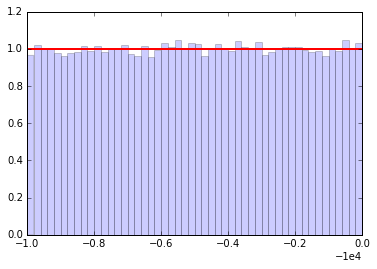

In [179]:
# Here's an example of usage
#pick one dist to use
#i will name which distribution specifically for this example 
distac5790 = distributions.Dist_ac5790()
#array of accept-reject accepted points
rvs = distac5790.rvs(n_samples)
#plot histogram
counts, bins, edges = plt.hist(rvs, bins=50, normed=True, alpha =0.2)
y = []
#bins are nodes for left and right edges
for bin in bins:
    #evaluate each pdf at bin and add to y to make line 
    y.append(distac5790.pdf(bin))
#plot line 
plt.plot(bins, y, c='r', lw=2)
print distac5790.std()

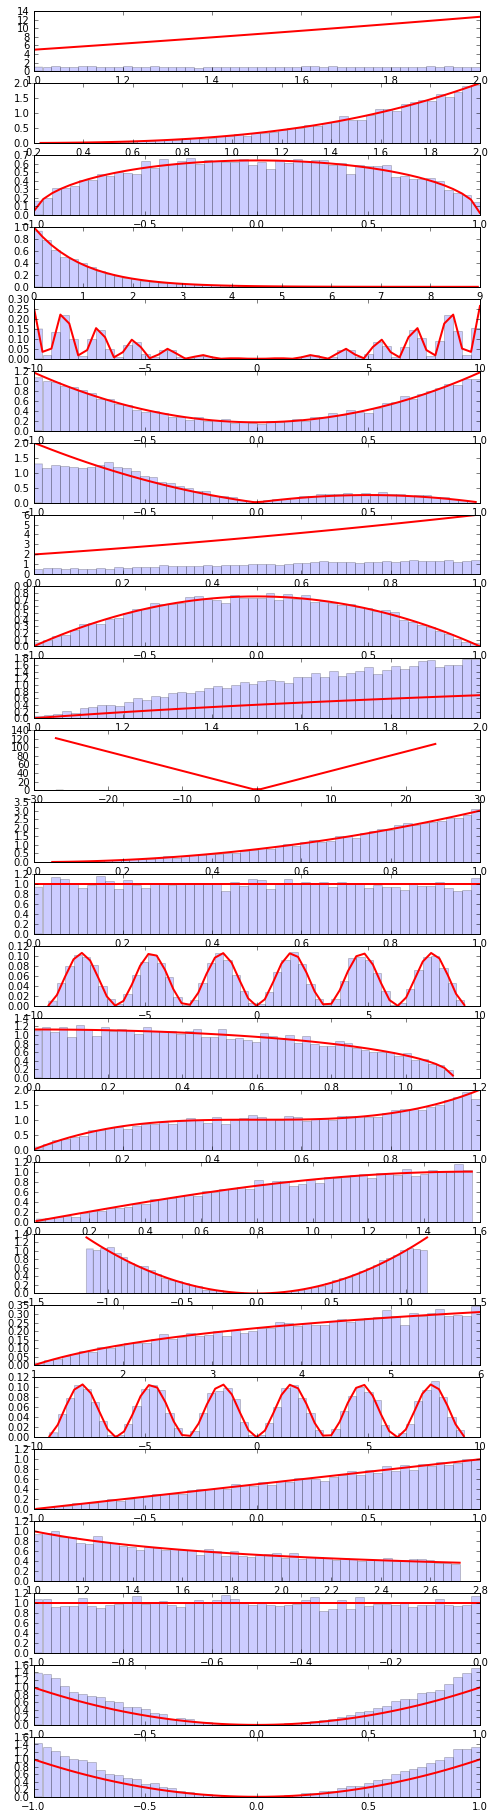

In [180]:
#create a figure object because we have multiple plots
fig = plt.figure(figsize=2*plt.figaspect(len(ok_distributions_list)))
#do the same thing as above, but for all OK distributions
#print ok_distributions_list
#enumerate will turn the list into a list of ordered duples, so we can 
#iterate by i and cls 
ok_distributions_list.append(all_distributions_list[20])
for i, cls in enumerate(ok_distributions_list):
    #get handle on each distribution
    dist = cls()
    #produce samples for each dist
    rvs = dist.rvs(N_SAMPLES)
    #add subplots that depend on length of OK dist list and iterate via i
    ax = fig.add_subplot(len(ok_distributions_list),1,i+1)
    counts, bins, patches = ax.hist(rvs, bins=50, normed=True, alpha=0.2)
    y = []
    #for each dist, evaluate pdf at every bin (x) value for nodes
    for bin in bins:
        y.append(dist.pdf(bin))
    plt.plot(bins, y, c='r', lw=2)

In [181]:
def do_convolution(dist, N):
    n_samples = N_SAMPLES
    q = np.zeros(n_samples)
    var_q = 0.
    mean_q = 0.

    for i in range(N):
        q = q+dist.rvs(n_samples)
        var_q = var_q + dist.std()**2
        mean_q = mean_q + dist.mean()

    std_q = np.sqrt( var_q )


    counts, bins, patches = plt.hist(q,bins=50, normed=True, alpha=.2)
    plt.plot(bins, norm.pdf(bins,loc=mean_q, scale=std_q), lw=2, c='r')

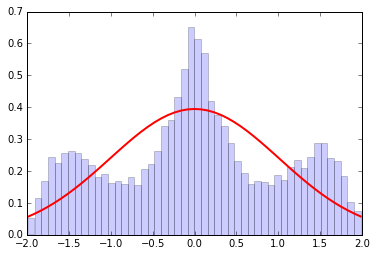

In [182]:
dist = distributions.Dist_nj18()
do_convolution(dist,2)

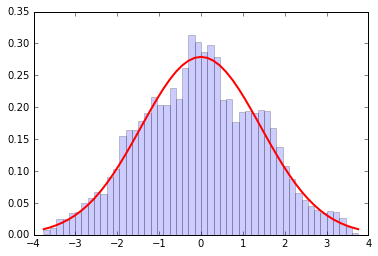

In [183]:
do_convolution(dist,4)

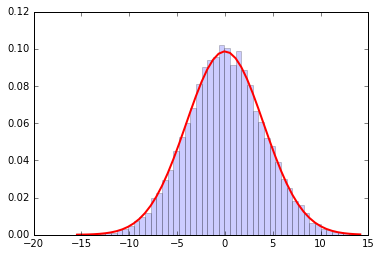

In [184]:
do_convolution(dist,32)

In [191]:
class Convolution(object):
    #constructor
    def __init__(self, listOfDistributions, numbOfDistributions):
        #initialize empty array of samples from an arbitrary dist
        q = np.zeros(N_SAMPLES)
        #initialize variance to zero (std**2)
        var_q = 0.
        #initialize mean to zero 
        mean_q = 0.
        for dist_class in np.random.choice(listOfDistributions, numbOfDistributions):
            #for each dist, create handle, dist
            dist = dist_class()
            #declare which dists this iteration is using
            print ('Using: %s ' % (dist_class.__name__))
            #add the successful accept reject samples from each dist
            q      += dist.rvs(N_SAMPLES)
            #add the variances of each dist
            var_q  += dist.std() ** 2.
            #add the averages of each dist 
            mean_q += dist.mean()
        #create array of standard deviations based off variance
        std_q = np.sqrt( var_q )
        #declare member variables, composed of the additions of 
        #the samples, means, and standard deviations of each distribution used
        self.dist = q
        self.mu   = mean_q
        self.std  = std_q
        #plot histogram with the composite samples, and organize into 
        #N_BINS, do not normalize the distribution here 
        cts, bns, patches = plt.hist(self.dist, bins=N_BINS, normed=False, alpha=.2)
        #collect values for the numbe of occurrences for each bin 
        self.counts = cts
        #collect values for the nodes (bns+1 bin edges)
        self.bins   = bns
    
    # calculate centers of each bin based on nodes
    def centers(self):
        return ((self.bins[1:] + self.bins[:-1]) / 2.) 

In [208]:
#write functions that use convolution objects
def calcBinWidth(conv):
    return (conv.bins[1] - conv.bins[0])

#convolution is the distribution of the sum of distributions
    
#plot
def plotPDFOfConvolution(conv):
    plt.plot(conv.centers(), calcPdf(conv), lw=2, c='r')
    plt.show()

def calculateNormalizationFactor(conv):
    return (calcBinWidth(conv) * N_SAMPLES)

# PDF (the expected outcome)
def calcPdf(conv):
    #calculate accepted values for the pdf
    #loc= mean, scale = std
    acceptedPDFVals = calculateNormalizationFactor(conv)*stats.norm.pdf(conv.centers(), loc=conv.mu, scale=conv.std)
    return acceptedPDFVals

# X2 func
def calcChi2(conv):
    #expected value of convolution
    exp = calcPdf(conv)    
    return np.sum(((conv.counts - exp) ** 2.) / exp)

Using: Dist_ejk483 
Using: Dist_ac5790 


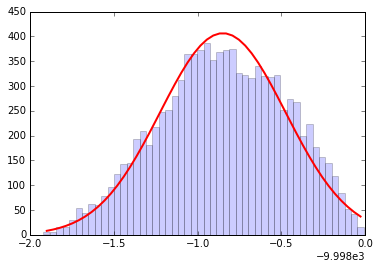

Using: Dist_dl3185 
Using: Dist_saw533 
Using: Dist_nj18 
Using: Dist_az1332 


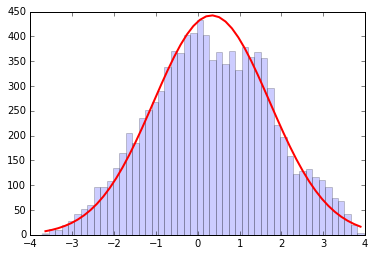

Using: Dist_jn1348 
Using: Dist_dl3185 
Using: Dist_ry643 
Using: Dist_az1332 
Using: Dist_jsg549 
Using: Dist_yr595 
Using: Dist_kw1621 
Using: Dist_kc90_3 


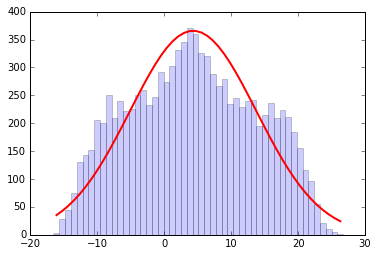

Using: Dist_hk1764 
Using: Dist_nj18 
Using: Dist_saw533 
Using: Dist_psa251 
Using: Dist_psa251 
Using: Dist_kw1621 
Using: Dist_psa251_2 
Using: Dist_psa251 
Using: Dist_yz2668 
Using: Dist_psa251 
Using: Dist_jsg549 
Using: Dist_nj18 
Using: Dist_my1462 
Using: Dist_ac5790 
Using: Dist_ejk483 
Using: Dist_nj18 


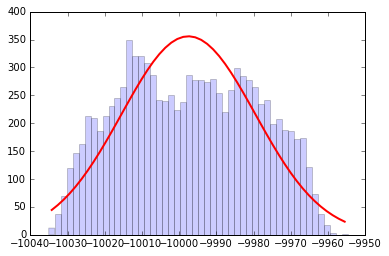

Using: Dist_nj18 
Using: Dist_kc90_2 
Using: Dist_ry643 
Using: Dist_nj18 
Using: Dist_ejk483 
Using: Dist_dl3185 
Using: Dist_my1462 
Using: Dist_jsg549 
Using: Dist_vag273_2 
Using: Dist_saw533 
Using: Dist_dl3185 
Using: Dist_recast 
Using: Dist_msc565 
Using: Dist_nj18 
Using: Dist_nj18 
Using: Dist_yr595 
Using: Dist_vag273_2 
Using: Dist_kjm538 
Using: Dist_nj18 
Using: Dist_my1462 
Using: Dist_yz2668 
Using: Dist_kc90_2 
Using: Dist_psa251 
Using: Dist_az1332 
Using: Dist_saw533 
Using: Dist_kc90_2 
Using: Dist_psa251 
Using: Dist_hk1764 
Using: Dist_dl3185 
Using: Dist_ih646 
Using: Dist_dl3185 
Using: Dist_ih646 


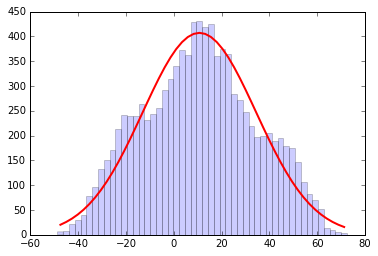

In [201]:
conv2  = Convolution(ok_distributions_list, 2)
plotPDFOfConvolution(conv2)


conv4  = Convolution(ok_distributions_list, 4)
plotPDFOfConvolution(conv4)


conv8  = Convolution(ok_distributions_list, 8)
plotPDFOfConvolution(conv8)


conv16  = Convolution(ok_distributions_list, 16)
plotPDFOfConvolution(conv16)

conv32  = Convolution(ok_distributions_list, 32)
plotPDFOfConvolution(conv32)

In [205]:
X2  = calcChi2(conv2)
X4  = calcChi2(conv4)
X8  = calcChi2(conv8)
X16 = calcChi2(conv16)
X32 = calcChi2(conv32)

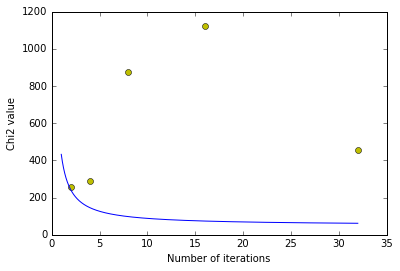

In [211]:
plt.plot(2., X2, 'yo')
plt.plot(4., X4, 'yo')
plt.plot(8., X8, 'yo')
plt.plot(16., X16, 'yo')
plt.plot(32., X32, 'yo')

x = np.linspace(1., 32., N_SAMPLES)
plt.plot(x, (calculateNormalizationFactor(conv2) / x) + N_BINS)
#note the 1/x relationship as s predicted by chi2 formula
plt.xlabel('Number of iterations')
plt.ylabel('Chi2 value')